In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("lig_center_coord.csv")
df

,Name,X,Y,Z
0,ZINC000015828584,31.100732,-68.352466,-19.699682
1,ZINC000015162196,32.084226,-69.530081,-17.776241
2,ZINC000012308844,30.244269,-70.427635,-18.096213
3,ZINC000192211539,20.236294,-62.642246,-30.185332
4,ZINC000008377044,33.267201,-68.401427,-17.001439
...,...,...,...,...
40237,ZINC000012575505,28.820047,-70.049030,-19.632810
40238,ZINC000014964630,19.574280,-63.096389,-29.648884
40239,ZINC000002868223,21.271535,-61.371278,-30.332749
40240,ZINC000004488639,27.537810,-70.464318,-20.316103


In [4]:
df1 = df[["X", "Z"]]
df1

,X,Z
0,31.100732,-19.699682
1,32.084226,-17.776241
2,30.244269,-18.096213
3,20.236294,-30.185332
4,33.267201,-17.001439
...,...,...
40237,28.820047,-19.632810
40238,19.574280,-29.648884
40239,21.271535,-30.332749
40240,27.537810,-20.316103


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
sse = {}
for k in range(1, 26):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df1)
    df1["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_
<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_
<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_
<ipython-input-6-090ab4847482>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["clusters"] = kmeans.labels_


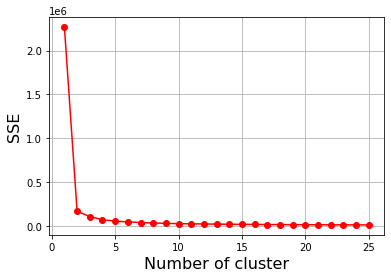

In [7]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o', color='red')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("SSE", fontsize=16)
plt.grid()
#plt.show()
plt.savefig("kmeans_contactres_elbow.png")

In [8]:
df1

,X,Z,clusters
0,31.100732,-19.699682,16
1,32.084226,-17.776241,8
2,30.244269,-18.096213,23
3,20.236294,-30.185332,22
4,33.267201,-17.001439,8
...,...,...,...
40237,28.820047,-19.632810,1
40238,19.574280,-29.648884,19
40239,21.271535,-30.332749,15
40240,27.537810,-20.316103,10


In [9]:
df2 = df1.drop("clusters", axis=1)
df2

,X,Z
0,31.100732,-19.699682
1,32.084226,-17.776241
2,30.244269,-18.096213
3,20.236294,-30.185332
4,33.267201,-17.001439
...,...,...
40237,28.820047,-19.632810
40238,19.574280,-29.648884
40239,21.271535,-30.332749
40240,27.537810,-20.316103


In [10]:
sil_avg = {}
for k in range(2, 26):
    kmeans = KMeans(n_clusters = k, max_iter=1000)
    kmeans_labels = kmeans.fit_predict(df2)
    sil_avg[k] = silhouette_score(df2, kmeans_labels)

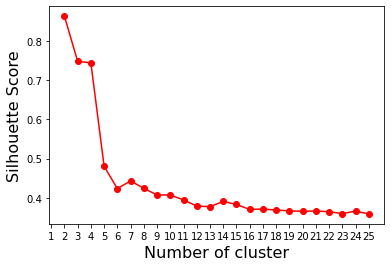

In [11]:
plt.figure()
plt.plot(list(sil_avg.keys()), list(sil_avg.values()), marker='o', color='red')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("Silhouette Score", fontsize=16)
plt.xticks(np.arange(1,26))
#plt.grid()
#plt.show()
plt.savefig("kmeans_contactfp_sil_score.png")